# Визуализация цифровых образов шлифов

Под цифровым образом понимается набор линий, каждая из которых задается четыремя координатами: началом линии (x_start, y_start) и концом (x_end, y_end).

Эта информация извлекается из .shp файлов и далее вся работа будет производиться только с наборами координат.

Ниже, в качестве примера, показано изображение, цифровой образ и распределение геометрических характеристик для одного из шлифов.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as sps
from tqdm.notebook import tqdm
import seaborn as sns
sns.set(style='ticks', font_scale=1.7)

from matplotlib import lines

import os

In [16]:
from thin_section_class import ThinSection

In [17]:
def draw_lineament(lines_segments, **kwargs):
    """
    Рисует все трещины для данного шлифа
    :param lines_segments: список линеаментов, где каждый линеамент задается как get_segments(line)
    :return: None
    """
    for line_segments in lines_segments:
        x = []
        y = []
        for seg in line_segments:
            x.append(seg[0])
            x.append(seg[2])
            y.append(seg[1])
            y.append(seg[3])
            
        plt.plot(x, y, **kwargs)

In [18]:
def get_shp_filename(path_to_shape_files, file_directory=''):
    """
    Ищет .shp файл в папке и возвращает его название
    :param path_to_shape_files: путь до директории с папками, в которых лежат shape файлы
    :param file_directory: название конкретной папки
    :return: название файла "file_name.shp"
    """
    p = os.path.join(path_to_shape_files, file_directory)
    for name in os.listdir(p):
        if name[-4:] == '.shp':
            return name

In [19]:
# путь до директории, в которой хранятся папки с .shp файлами
path_to_shape_files = '.\\shp_files'

## Шлиф 55-3


Исходное изображение шлифа

![](images/thin_section_image_55-3.png)

Цифровой образ шлифа

In [20]:
name = '55-3'

# название .shp файла
shp_filename = get_shp_filename(path_to_shape_files, name)
# полный путь до .shp файла
path_to_shp = os.path.join(path_to_shape_files, name, shp_filename)

In [21]:
# создание объекта класса ThinSection
data = ThinSection(path_to_shp)

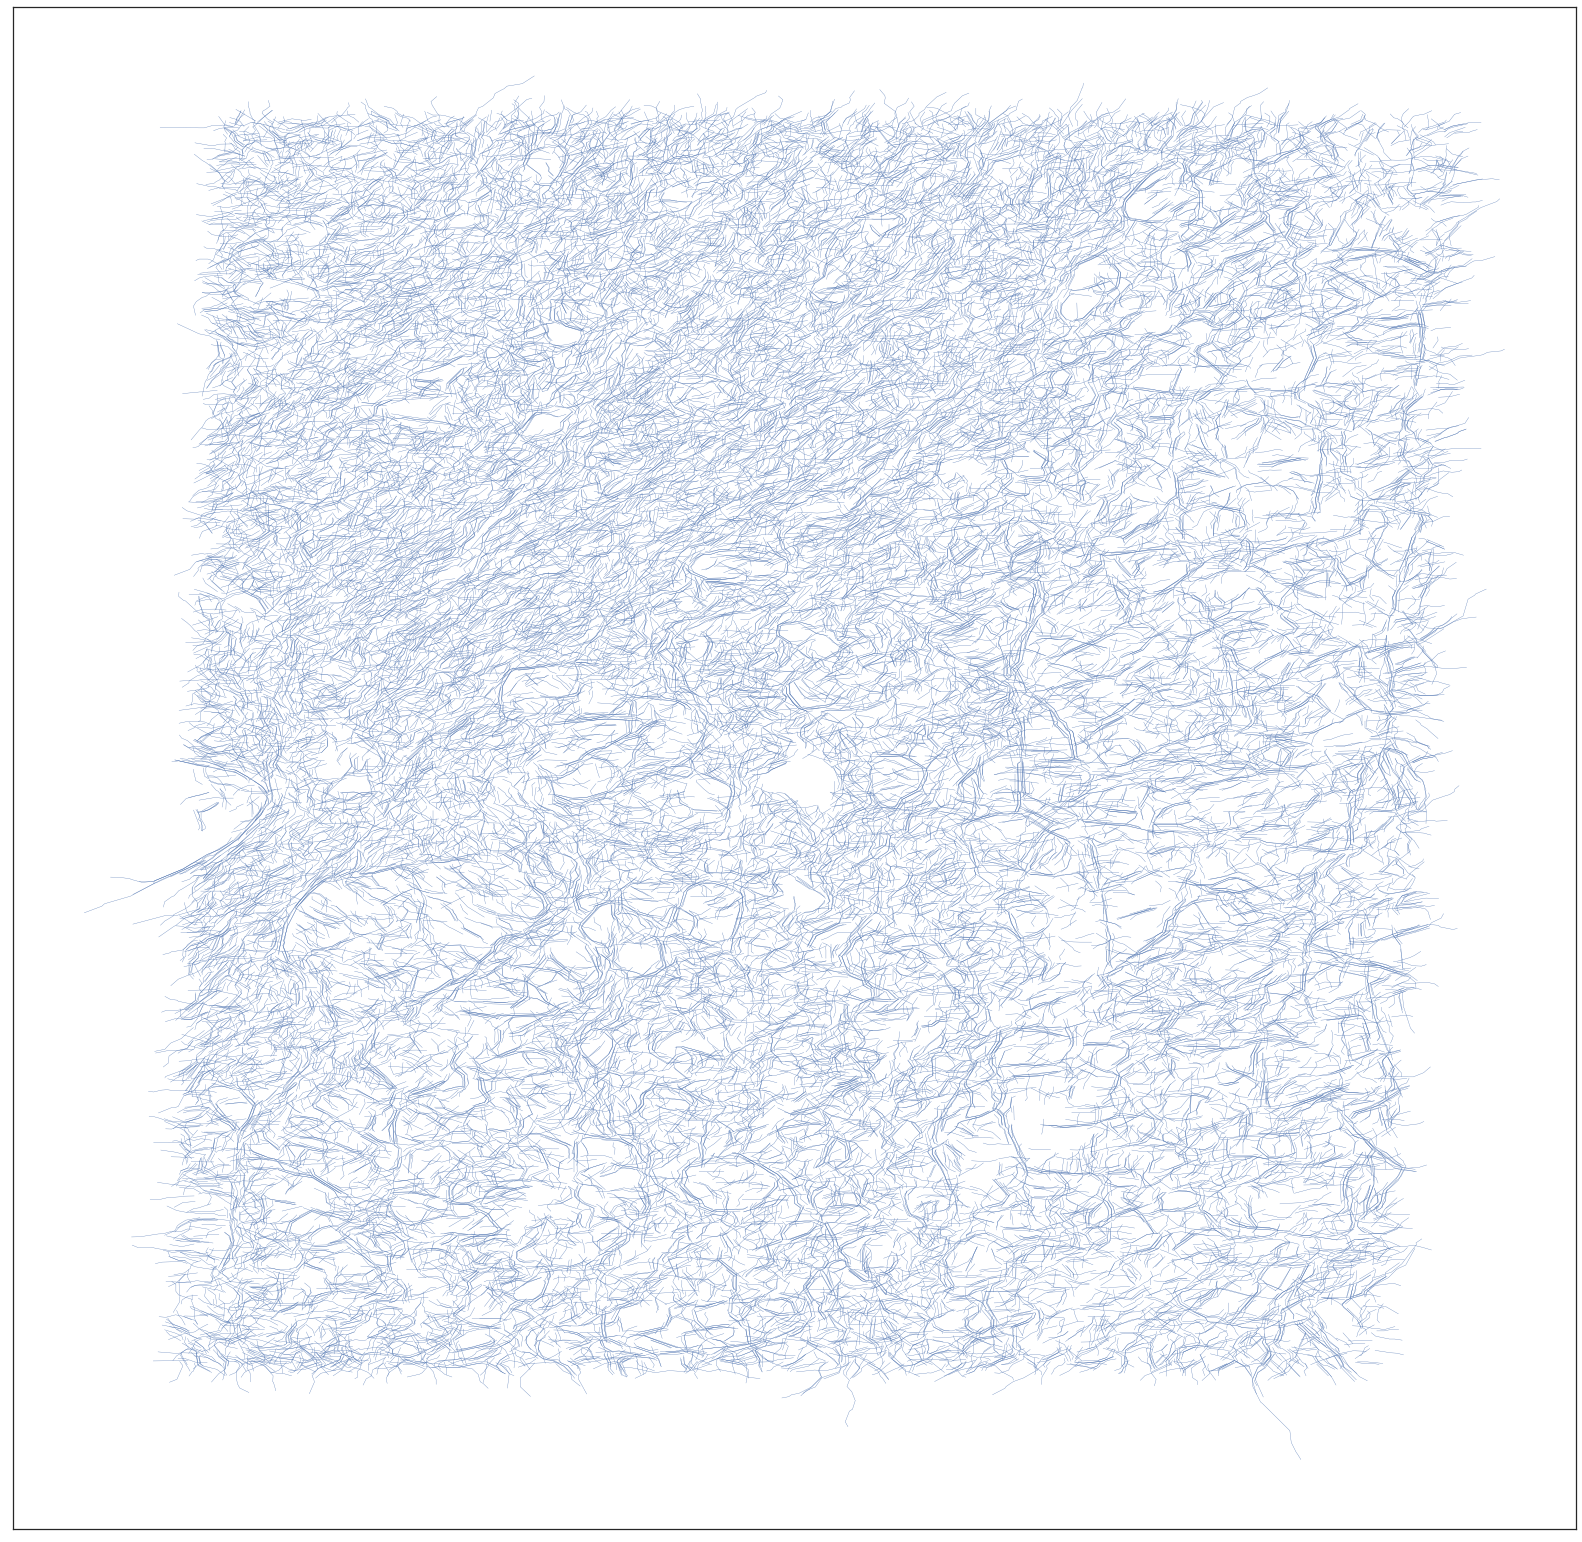

In [22]:
fig = plt.figure(figsize=(28, 28))

draw_lineament(data.lineaments_sample, color='C0', linewidth=0.3)

plt.xticks([]); plt.yticks([])
None

Распределение плотности трещин по шлифу

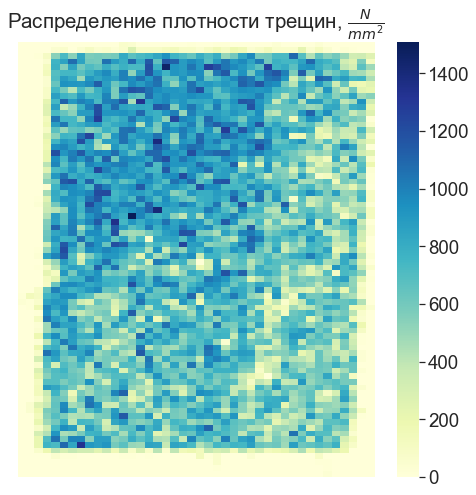

In [23]:
# двумерная карта плотности
data.draw_density_histogram_2d()

Роз-диаграмма по углам наклона трещин

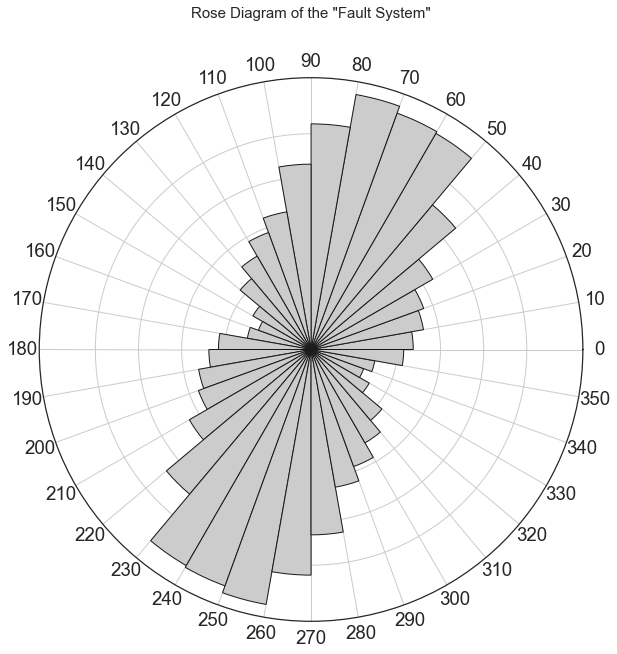

In [24]:
data.draw_rose_diagram_lineaments()

Распределение длин трещин

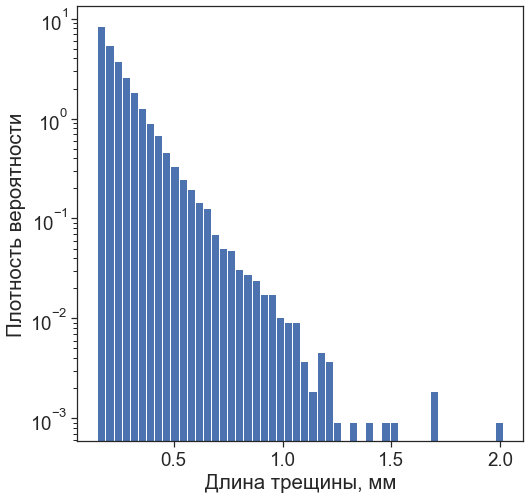

In [25]:
data.draw_trace_length_distribution()